In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing data
df = pd.read_excel("/Users/schand/Documents/ML Homework 1/AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### 1. Visualize the univariate distribution of each continuous input variable, and the distribution of the target variable. Write down anything you find worth noting. Is there something that might require special treatment? 


(2930, 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1731c750>,
      dtype=object)

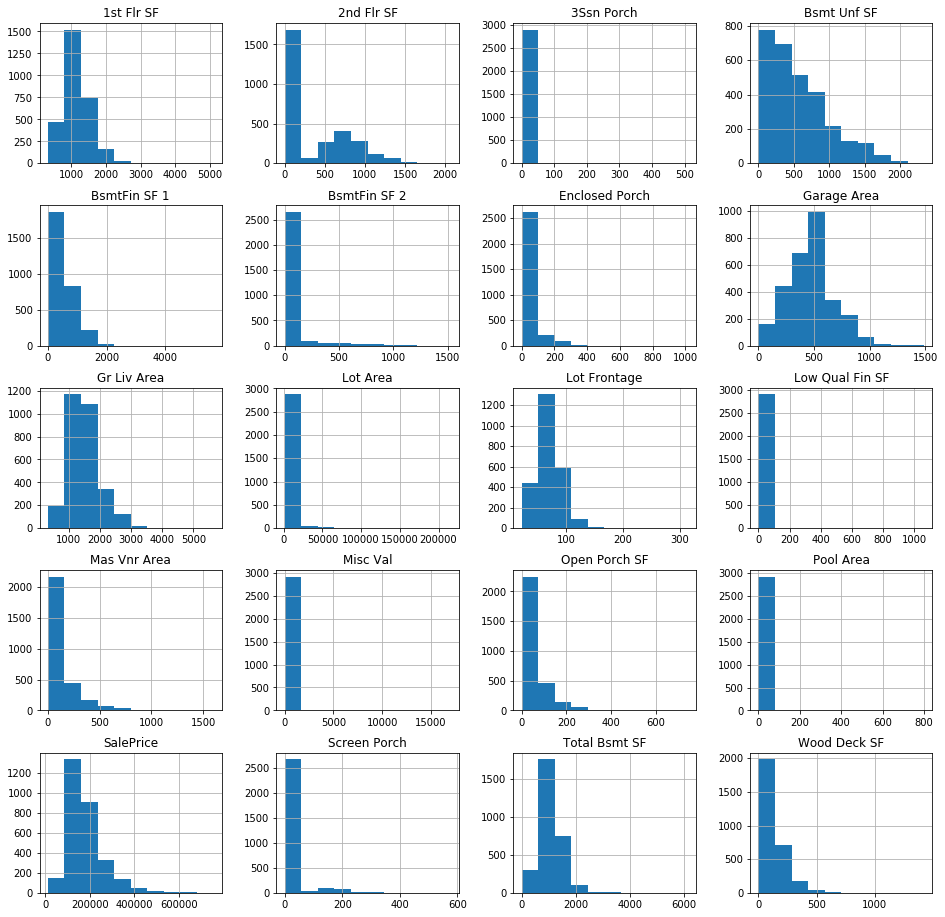

In [3]:
# Visualizing distribution og each continiuous variables and target variable
df_contd = df[['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
               'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 
               'Gr Liv Area', 'Garage Area', 'Wood Deck SF','3Ssn Porch', 'Open Porch SF',  
               'Enclosed Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']]
print(df_contd.shape)
df_contd.hist(figsize = (16,16))

####  From histrogram it looks there are several outlier in many input variable. The special treatment needed to rmove these outlier to make distribution normal.

Lot Frontage           38.00
Lot Area             7050.20
Mas Vnr Area          256.00
BsmtFin SF 1          925.00
BsmtFin SF 2            0.00
Bsmt Unf SF           896.00
Total Bsmt SF         809.60
1st Flr SF            767.00
2nd Flr SF            857.65
Low Qual Fin SF         0.00
Gr Liv Area           963.95
Garage Area           402.00
Wood Deck SF          213.65
3Ssn Porch              0.00
Open Porch SF         104.00
Enclosed Porch         34.00
Screen Porch            0.00
Pool Area               0.00
Misc Val                0.00
SalePrice          136860.00
dtype: float64
(1836, 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17a68190>,
      dtype=object)

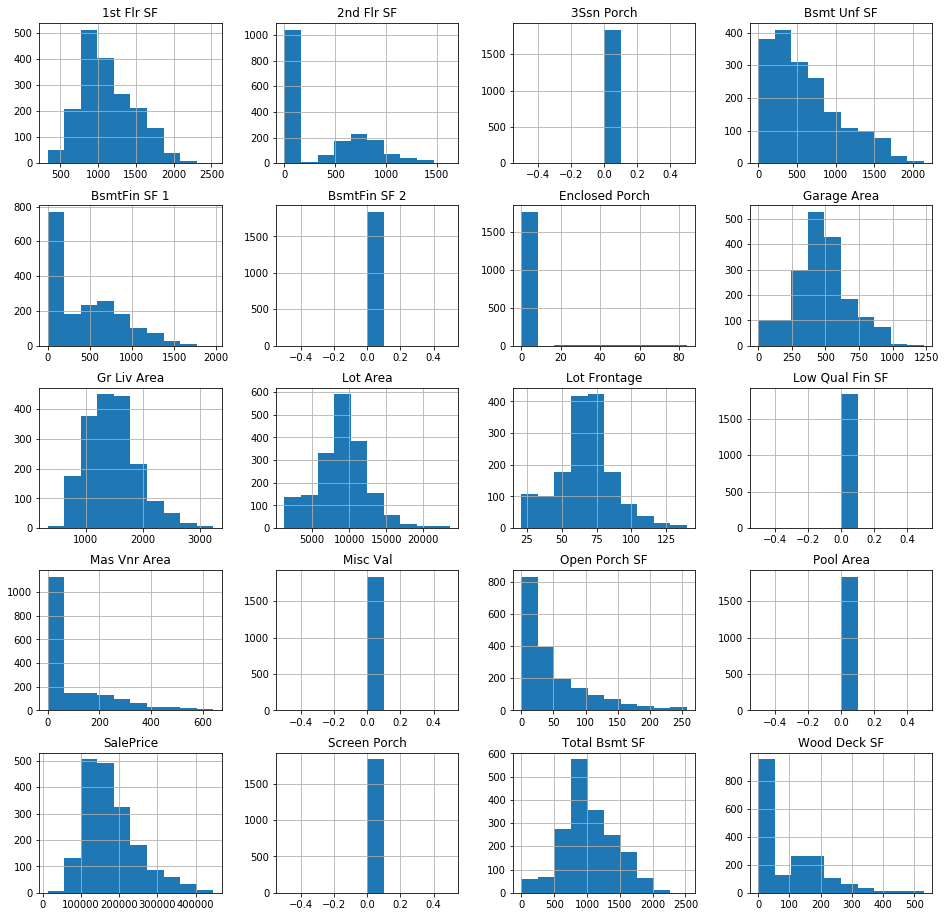

In [4]:
#ZSCORE TEST
#from scipy import stats
#z = np.abs(stats.zscore(df_contd))
#print(df_contd.shape)
#print(np.where(z > 3))
#df_contd_o = df_contd[(z<3).all(axis=1)]

#Interquartile Test
Q1 = df_contd.quantile(0.15)
Q3 = df_contd.quantile(0.85)
IQR = Q3 - Q1
print(IQR)
df_contd = df_contd[~((df_contd < (Q1 - 1.5 * IQR)) |(df_contd > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_contd.shape)
df_contd.hist(figsize = (16,16))

### 2. Visualize the dependency of the target on each continuous feature via scatter plot.

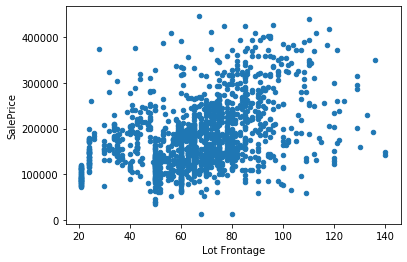

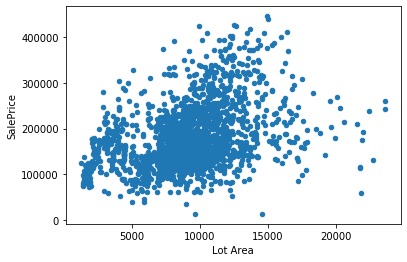

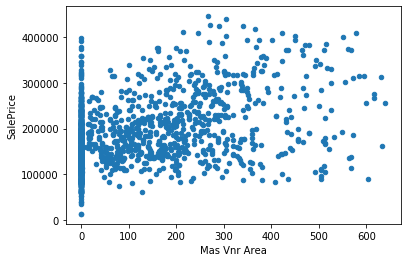

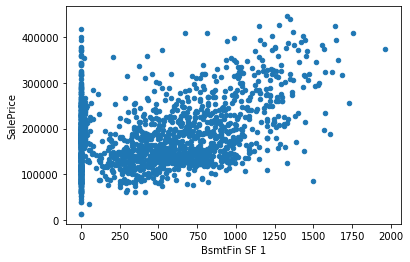

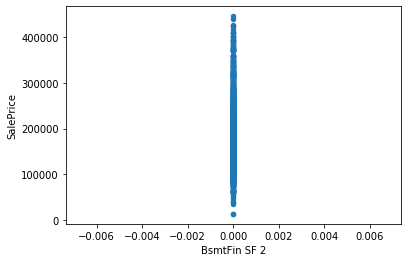

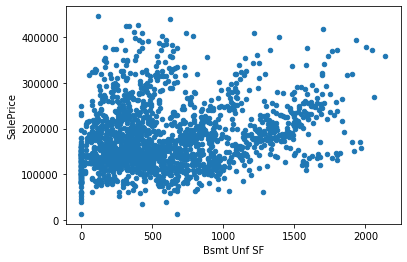

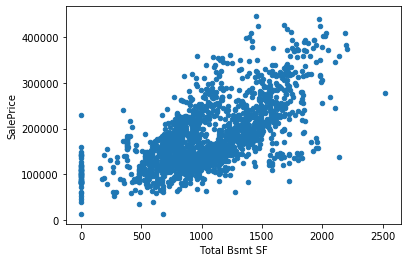

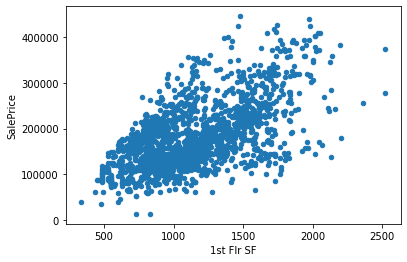

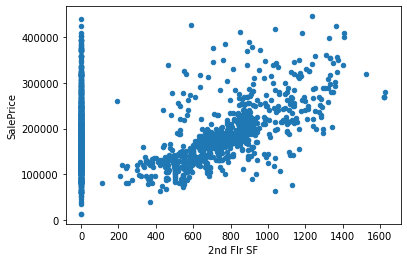

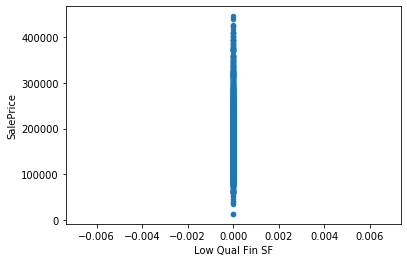

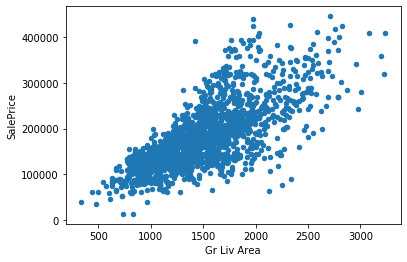

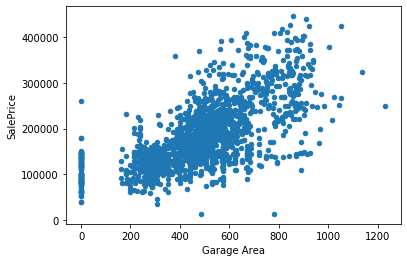

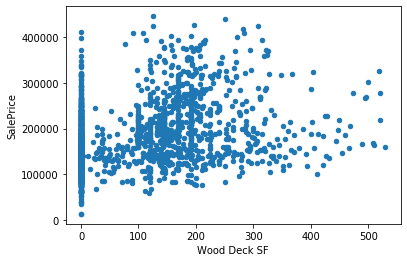

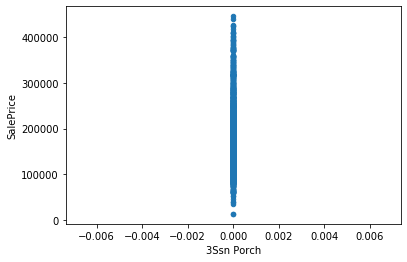

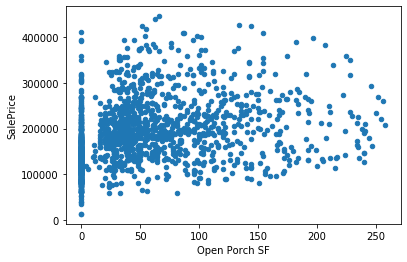

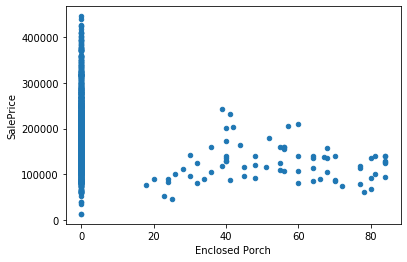

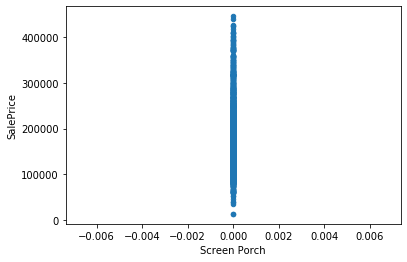

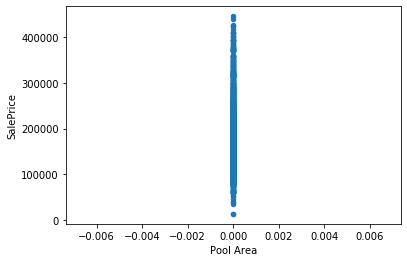

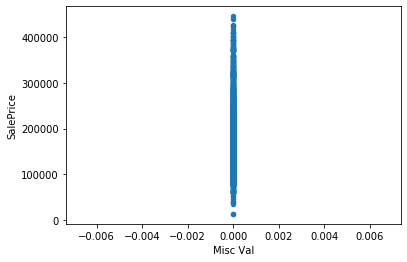

In [5]:
for i in range(0,19):
    df_contd.plot.scatter(x = i, y = 'SalePrice')
#Scatter plots are after removing outliers

### 3. Split data in training and test set. Do not use the test-set unless for a final evaluation in Step 6. For each categorical variable, cross-validate a Linear Regression model using just this variable (one-hot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the target. 

In [6]:
#Removing some rows and columns containing NaN
cols_remove = ['Alley','Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
df = df.drop(cols_remove,axis=1).dropna()

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [8]:
#Split data in train and test set
df_train, df_test = np.split(df, [int(.8*len(df))])

In [9]:
df_catg_train = df_train.select_dtypes(include=['object'])
df_num_train= df_train.select_dtypes(include=['number'])
df_num_train = df_num_train.drop(['SalePrice'],axis=1)

#### OneHotEncoder

In [10]:
import category_encoders as ce
enc = ce.OneHotEncoder(use_cat_names=True)
df_train_enc = enc.fit_transform(df_catg_train)

In [11]:
#fitting linear regression model with all input variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_model = LinearRegression()
y_train = df_train['SalePrice']
X_train = df_train_enc
linear_model.fit(X_train,y_train)
y_predict = linear_model.predict(X_train) 
R2 = r2_score(y_train,y_predict)
print('R^2 score of Linear Regression Model is', R2)

R^2 score of Linear Regression Model is 0.844044185859486


In [12]:
#fitting linear regression model with single input variable
Rsquare = []
for i in range(0,len(df_train_enc.columns)):
    X_train = df_train_enc.iloc[:,[i]]
    linear_model.fit(X_train,y_train)
    y_predict = linear_model.predict(X_train)
    R2 = r2_score(y_train, y_predict)
    Rsquare.append(R2)

#### Visualize the relationship of the categorical variables that provide the best R^2 value with the target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a8cce90>]],
      dtype=object)

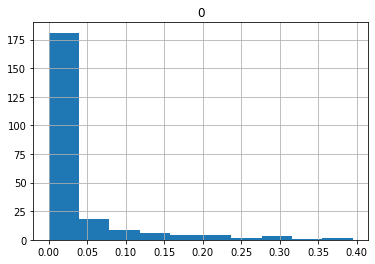

In [13]:
pd.DataFrame(Rsquare).hist()

##### Majority of Categorical features have relatively small value of R^2 so these features have small effect on target. Next step, we can set some cut-off value of r2 score to consider only featurres that have significant effect on target.

In [14]:
# Taking 10 % cutoff on r2 score
clms = []
for i in range(0,len(df_train_enc.columns)):
    linear_model = LinearRegression()
    X_train = df_train_enc.iloc[:,[i]]
    #X_train = 
    y_train = df_train['SalePrice']
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_train)
    R2 = r2_score(y_train, y_pred)
    if R2 > 0.1: 
        clms.append(X_train.columns[0])
    #df2 = dframe.assign(dframe)
dframe= df_train_enc[clms]
print(dframe.shape)
dframe.head()

(1774, 27)


,Lot Shape_Reg,Neighborhood_NridgHt,Roof Style_Hip,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Mas Vnr Type_Stone,Mas Vnr Type_None,Exter Qual_TA,Exter Qual_Gd,Exter Qual_Ex,...,Heating QC_TA,Heating QC_Ex,Kitchen Qual_TA,Kitchen Qual_Ex,Garage Type_Attchd,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_Unf,Sale Type_New,Sale Condition_Partial
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1,1,0,0,1,1,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0
4,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


### 4. Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help?

In [15]:
#Defining X_train
X_train = df_train.drop(['SalePrice'],axis=1)
X_train.shape

(1774, 76)

#### ColumnTransformer and Pipeline

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
ct = ColumnTransformer([
    ('ohe',OneHotEncoder(),df_catg_train.columns),
    ('ss',StandardScaler(),df_num_train.columns)
     ])
df_catg_trans = ct.fit_transform(X_train)

#### Linear Regression using Cross Validation

In [17]:
from sklearn.pipeline import Pipeline
pipeline_1 = Pipeline([('transformer_1',ct),
                 ('model_1',linear_model)
                ])
pipeline_1.fit(X_train,y_train)
y_predict = pipeline_1.predict(X_train)
R2 = r2_score(y_train,y_predict)
print('The R^2 value fir Linear Refression', R2)

The R^2 value fir Linear Refression 0.9262721770598901


#### Ridge Regression using Cross Validation

In [18]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
pipeline_2 = Pipeline([('transformer_2',ct),
                 ('model_2',Ridge())
                ])
pipeline_2.fit(X_train, y_train)
y_predict = pipeline_2.predict(X_train)
R2 = r2_score(y_train,y_predict)
print('The R^2 value for Ridge Refression', R2)

The R^2 value for Ridge Refression 0.9170095899819165


#### Lasso Regression using Cross Validation

In [19]:
pipeline_3 = Pipeline([('transformer_3',ct),
                 ('model_3',Lasso())
                ])
pipeline_3.fit(X_train, y_train)
y_predict = pipeline_3.predict(X_train)
R2 = r2_score(y_train,y_predict)
print('The R^2 value for Lasso Regression', R2)

The R^2 value for Lasso Regression 0.926253393590535


#### ElasticNet Regression using Cross Validation

In [20]:
pipeline_4 = Pipeline([('transformer_4',ct),
                 ('model_4',ElasticNet())
                ])
pipeline_4.fit(X_train, y_train)
y_predict = pipeline_4.predict(X_train)
R2 = r2_score(y_train,y_predict)
print('The R^2 value for ElasticNet Regression', R2)

The R^2 value for ElasticNet Regression 0.8457094031290224


### 5. Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

#### Tuning Parametes of Ridge Regression

In [21]:
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1000, 100,10,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas))
pipeline_5 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_5.fit(X_train, y_train)
y_predict = pipeline_5.predict(X_train)
R2 = r2_score(y_train,y_predict)
print(R2)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.cv_results_)

0.9037077044784905
GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8364494533599259
10.0
{'mean_fit_time': array([0.0051796 , 0.00639801, 0.01137609, 0.01876078, 0.02473946,
       0.02652063, 0.02717052, 0.02665734, 0.02719073]), 'std_fit_time': array([0.00051026, 0.00027834, 0.00029919, 0.001569  , 0.0028312 ,
       0.00381719, 0.00356374, 0.00369694, 0.00419066]), 'mean_score_time': array([0.0006166 , 0.00057354, 0.0005991 , 0.00065703, 0.00060043,
       0.00060625, 0.00064912, 0.00061622, 0.0006175 ]), 'st

##### Visualization the dependence of the validation score on the parameters for Ridge Regression

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


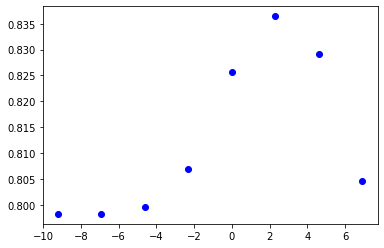

In [22]:
cross_val_scores = np.array([0.80449569, 0.82909645, 0.83644945, 0.82565029, 0.80696268,
       0.79951714, 0.79822527, 0.79823229, 0.79826834])
parameters = np.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo',label='raw data')

#### Tuning Parametes of Lasso Regression

In [23]:
# prepare a range of alpha values to test
alphas = np.array([1000, 100,10,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
pipeline_6 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_6.fit(X_train, y_train)
y_predict = pipeline_6.predict(X_train)
R2 = r2_score(y_train,y_predict)
print(R2)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.cv_results_)

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2690314461.1988525, tolerance: 935181843.2013673
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15320918515.405823, tolerance: 944596634.0086
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37356496086.53479, tolerance: 1057850114.7245528
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_c

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386870217510.9164, tolerance: 1033187288.3390176
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345600878232.73615, tolerance: 944596634.0086
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With a

0.9117173196667846
GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8318867387542157
100.0
{'mean_fit_time': array([0.04713821, 0.3407588 , 0.43799629, 0.92179494, 1.0011858 ,
       1.03263721, 1.02005496, 1.02154756, 1.01830311]), 'std_fit_time': array([0.00433086, 0.04687852, 0.2140716 , 0.08149593, 0.04225218,
       0.01264657, 0.01244127, 0.00379439, 0.00706196]), 'mean_score_time': array([0.00063891, 0.00076799, 0.000759

##### Visualization the dependence of the validation score on the parameters for Lasso Regression

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Dependence of Validation Score on Parameters')

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0, flags=flags)


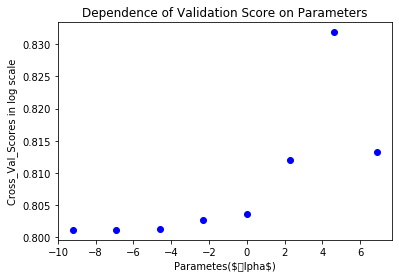

In [24]:
cross_val_scores = np.array([0.81330297, 0.83188674, 0.81194803, 0.80363137, 0.80262969,
       0.80128287, 0.8011226 , 0.80110596, 0.80110412])
parameters = np.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo')
#plt.plot(np.log(parameters,np.log(result),'b--',label='fitted data')
plt.xlabel('Parametes($\alpha\$)')
plt.ylabel('Cross_Val_Scores in log scale')
plt.title('Dependence of Validation Score on Parameters')

#### Tuning Parametes of ElasticNet Regression

In [25]:
# prepare a range of alpha values to test
alphas = np.array([1000, 100,10,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=ElasticNet(), param_grid=dict(alpha=alphas))
pipeline_7 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_7.fit(X_train, y_train)
y_predict = pipeline_7.predict(X_train)
R2 = r2_score(y_train,y_predict)
print(R2)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.cv_results_)

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2506232300.737793, tolerance: 935181843.2013673
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2090076722.2196045, tolerance: 1127558525.133809
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3535975880.0092773, tolerance: 1033187288.3390176
  max_iter, tol, rng, random, positive)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

0.9047977422713833
GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8356820043904942
0.01
{'mean_fit_time': array([0.00532899, 0.00697894, 0.0120142 , 0.06535449, 0.21078391,
       0.99543033, 1.00375452, 0.99504776, 1.0156446 ]), 'std_fit_time': array([0.00033982, 0.00012374, 0.00051842, 0.00099926, 0.00574637,
       0.00596135, 0.00518217, 0.03491584, 0.005

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941402015.3813477, tolerance: 1277307865.629944
  max_iter, tol, rng, random, positive)


#### Visualization the dependence of the validation score on the parameters for ElasticNet Regression

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Dependence of Validation Score on Parameters')

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/schand/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0, flags=flags)


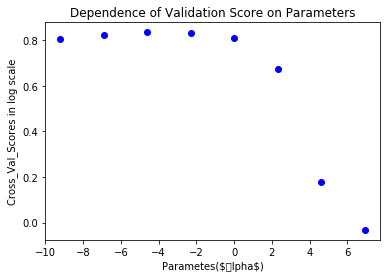

In [26]:
cross_val_scores = np.array([-0.03215822,  0.17853997,  0.67472324,  0.81123674,  0.83113217, 0.835682 ,  
                              0.82510417, 0.8057886 ,  0.80110412])
parameters = np.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo',label='raw data')
#plt.plot(np.log(parameters,np.log(result),'b--',label='fitted data')
plt.xlabel('Parametes($\alpha\$)')
plt.ylabel('Cross_Val_Scores in log scale')
plt.title('Dependence of Validation Score on Parameters')

### 6. Visualize the coefficients of the resulting models. Do they agree on which features are important? Evaluate the model performance on the test set.

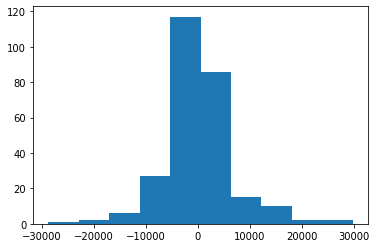

In [28]:
# Coefficients for Ridge Regression 
pipeline = Pipeline([('transformer1',ct),
                 ('model1',Ridge(alpha=10))
                ])
pipeline.fit(X_train,y_train)
Ridge_coefficients = pipeline['model1'].coef_
n, bins, patches = plt.hist(Ridge_coefficients)

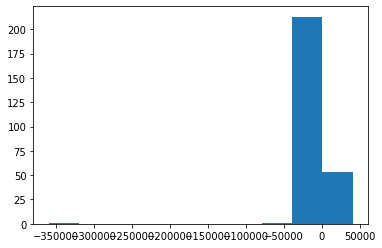

In [29]:
# Coefficients for Lasso Regression 
pipeline = Pipeline([('transformer2',ct),
                 ('model2',Lasso(alpha=100))
                ])
pipeline.fit(X_train,y_train)
Ridge_coefficients = pipeline['model2'].coef_
n, bins, patches = plt.hist(Ridge_coefficients)

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941402015.3813477, tolerance: 1277307865.629944
  max_iter, tol, rng, random, positive)


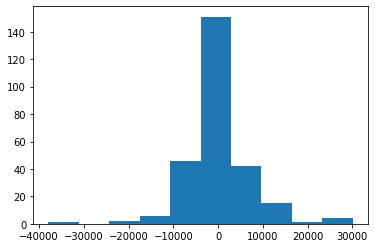

In [30]:
# Coefficients for ElasticNet Regression 
pipeline = Pipeline([('transformer3',ct),
                 ('model3',ElasticNet(alpha=0.01))
                ])
pipeline.fit(X_train,y_train)
ElasticNet_coefficients = pipeline['model3'].coef_
n, bins, patches = plt.hist(ElasticNet_coefficients)

###### The absolute value of coefficients of regression suggest its influence on the target. Greater the absolute value of coeffcient, higher influece on the target. Some features have postive effect ( postive coefficients ) while  others have negative effect (negative coefficients). I our case, the three distributions of  coefficients of the three different models shows that only few features which have larger absolute value (away from zero) are important and have greater effects on the target.

### Evaluate the model performance on the test set.

In [35]:
df_test = df_test[df_test!='ImStucc']
df_test1 =df_test.dropna()

In [36]:
X_test = df_test1.drop(['SalePrice'],axis=1)
y_test = df_test1['SalePrice']

#### Linear Regression Model

In [37]:
y_predict = pipeline_1.predict(X_test)
R2 = r2_score(y_test,y_predict)
print('The R^2 coefficent ', R2)

The R^2 coefficent  0.9107332394387855


#### Ridge Regression Model

In [38]:
y_predict = pipeline_2.predict(X_test)
R2 = r2_score(y_test,y_predict)
print('The R^2 coefficent', R2)

The R^2 coefficent 0.9163312723341229


#### Lasso Regression Model

In [39]:
y_predict = pipeline_3.predict(X_test)
R2 = r2_score(y_test,y_predict)
print('The R^2 coefficent', R2)

The R^2 coefficent 0.9117921307204744


#### ElasticNet Regression Model

In [40]:
y_predict = pipeline_4.predict(X_test)
R2 = r2_score(y_test,y_predict)
print('The R^2 coefficent', R2)

The R^2 coefficent 0.8771036541233241
